In [56]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [57]:
pd.set_option('display.max_rows', None)

def resumetable(df):
    print(f'Dataset Shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name', 'dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Missing percent'] = df.isnull().sum().values/len(train)
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    return summary

In [77]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [78]:
train['Head Purge Position X Collect Result_Fill2'].describe()
# lst = []
# for idx, data in enumerate(train['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam']):
#     if data == 'OK':
#         lst.append(idx)
# print(len(lst))
# print(len(train['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam']))

count    40506.000000
mean       164.156081
std         87.513657
min         91.800000
25%         91.800000
50%         91.800000
75%        270.000000
max        270.000000
Name: Head Purge Position X Collect Result_Fill2, dtype: float64

In [60]:
# train, test에서 위의 picky만 남기고 모두 drop
# train = train[[col for col in train.columns if col in picky]]
# test = test[[col for col in test.columns if col in picky]]
# for col in train.columns:
#     if col not in picky:
#         train.drop(col, inplace=True, axis=1)

# for col in test.columns:
#     if col not in picky:
#         test.drop(col, inplace=True, axis=1)

In [61]:
resumetable(train)

Dataset Shape: (40506, 464)


,Name,dtypes,Missing,Missing percent,Uniques,First Value,Second Value,Third Value
0,Wip Line_Dam,object,0,0.000000,1,IVI-OB6,IVI-OB6,IVI-OB6
1,Process Desc._Dam,object,0,0.000000,1,Dam Dispenser,Dam Dispenser,Dam Dispenser
2,Equipment_Dam,object,0,0.000000,2,Dam dispenser #1,Dam dispenser #1,Dam dispenser #2
3,Model.Suffix_Dam,object,0,0.000000,7,AJX75334505,AJX75334505,AJX75334501
4,Workorder_Dam,object,0,0.000000,663,4F1XA938-1,3KPM0016-2,4E1X9167-1
5,Insp. Seq No._Dam,int64,0,0.000000,1,1,1,1
6,Insp Judge Code_Dam,object,0,0.000000,1,OK,OK,OK
7,CURE END POSITION X Collect Result_Dam,float64,0,0.000000,2,240.0,240.0,1000.0
8,CURE END POSITION X Unit Time_Dam,float64,40506,1.000000,0,NaN,NaN,NaN
9,CURE END POSITION X Judge Value_Dam,float64,40506,1.000000,0,NaN,NaN,NaN


In [62]:
#B
for col in train.columns:
    if len(train[col].unique()) in [0,1]:
        train.drop(col,inplace=True,axis=1)
        test.drop(col,inplace=True,axis=1)

In [63]:
#C
nullcolumn = train.columns[train.isnull().sum()>=29000]
train.drop(nullcolumn,inplace=True,axis=1)
test.drop(nullcolumn,inplace=True,axis=1)

In [64]:
obj_col=list(train.select_dtypes(include=['object']).columns)
obj_col.remove("target")

print(obj_col)

['Equipment_Dam', 'Model.Suffix_Dam', 'Workorder_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam', 'Model.Suffix_AutoClave', 'Workorder_AutoClave', 'Chamber Temp. Judge Value_AutoClave', 'Equipment_Fill1', 'Model.Suffix_Fill1', 'Workorder_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1', 'Equipment_Fill2', 'Model.Suffix_Fill2', 'Workorder_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2']


In [65]:
#E
notobj_col = list(train.select_dtypes(exclude=['object']).columns)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[notobj_col] = scaler.fit_transform(train[notobj_col])
test[notobj_col] = scaler.transform(test[notobj_col])

In [66]:
#F
train.fillna("NOK", inplace=True)
test.fillna("NOK", inplace=True)

/tmp/ipykernel_55/894046972.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NOK' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test.fillna("NOK", inplace=True)


In [160]:
categorical = []
for col in train.columns:
    if train[col].dtype == 'object' or train[col].dtype.name == 'category':
        train[col] = train[col].astype('category')
        test[col] = test[col].astype('category')


train_data, valid_data = train_test_split(
    train,
    test_size=0.2,
    stratify=train['target'],
    random_state=42
)



In [161]:
normal_ratio = 2.0  # 1.0 means 1:1 ratio
RANDOM_STATE = 42
df_normal = train_data[train_data["target"] == "Normal"]
df_abnormal = train_data[train_data["target"] == "AbNormal"]

num_normal = len(df_normal)
num_abnormal = len(df_abnormal)
print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")

df_normal = df_normal.sample(n=int(num_abnormal * normal_ratio), replace=False, random_state=RANDOM_STATE)
df_concat = pd.concat([df_normal, df_abnormal], axis=0).reset_index(drop=True)
df_concat.value_counts("target")

  Total: Normal: 30524, AbNormal: 1880


target
Normal      3760
AbNormal    1880
Name: count, dtype: int64

In [162]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [163]:
from catboost import CatBoostClassifier
from scipy.stats import randint
from sklearn.utils.fixes import loguniform
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

param_grid = {
    'n_estimators': randint(500, 1000),
    'depth': randint(1, 15),
    'learning_rate': loguniform(1e-3, 0.1),
    'min_data_in_leaf': randint(1, 5),
    'grow_policy': ['SymmetricTree', 'Lossguide', 'Depthwise']
}

train_x = df_concat.drop("target",axis=1)
train_y = df_concat["target"]
valid_x = valid_data.drop("target",axis=1)
valid_y = valid_data["target"]
valid_y = [0 if el == 'Normal' else 1 for el in valid_y]
train_y = [0 if el == 'Normal' else 1 for el in train_y]


import lightgbm as lgb

model = lgb.LGBMClassifier(
    num_leaves=16,
    learning_rate=0.01,
    n_estimators=1000
)
categorical = []
for col in train_x.columns:
    if train_x[col].dtype == 'object' or train_x[col].dtype.name == 'category':
        train_x[col] = train_x[col].astype('category')
        valid_x[col] = valid_x[col].astype('category')
        categorical.append(col)

# best_params= model.randomized_search(param_grid, train_x, train_y, cv=3, n_iter=10)

model.fit(train_x, train_y, categorical_feature=categorical)


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1880, number of negative: 3760
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5659
[LightGBM] [Info] Number of data points in the train set: 5640, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147


LGBMClassifier(learning_rate=0.01, n_estimators=1000, num_leaves=16)

In [164]:
from sklearn.metrics import classification_report, f1_score

valid_x = valid_data.drop("target",axis=1)
valid_y = valid_data["target"]
# 모델로 예측
valid_y_pred = model.predict(valid_x, categorical_feature=categorical)

# df_valid에 실제 타겟값이 있다고 가정 (예: valid_y)

valid_y = [0 if el == 'Normal' else 1 for el in valid_y]

print(np.array(valid_y).shape)
print(np.array(valid_y_pred).shape)
# 정확도 및 기타 지표 계산
print("f1_score:", f1_score(valid_y, valid_y_pred,pos_label = 1))
print(classification_report(valid_y, valid_y_pred))

[LightGBM] [Warning] Pressure is set=, Pressure= will be ignored. Current value: Pressure=
[LightGBM] [Warning] Pressure is set=, Pressure= will be ignored. Current value: Pressure=
[LightGBM] [Warning] COORDINATE is set=, COORDINATE= will be ignored. Current value: COORDINATE=
[LightGBM] [Warning] COORDINATE is set=, COORDINATE= will be ignored. Current value: COORDINATE=
[LightGBM] [Warning] COORDINATE is set=, COORDINATE= will be ignored. Current value: COORDINATE=
[LightGBM] [Warning] COORDINATE is set=, COORDINATE= will be ignored. Current value: COORDINATE=
[LightGBM] [Warning] COORDINATE is set=, COORDINATE= will be ignored. Current value: COORDINATE=
[LightGBM] [Warning] NORMAL is set=, NORMAL= will be ignored. Current value: NORMAL=
[LightGBM] [Warning] NORMAL is set=, NORMAL= will be ignored. Current value: NORMAL=
[LightGBM] [Warning] NORMAL is set=, NORMAL= will be ignored. Current value: NORMAL=
[LightGBM] [Warning] NORMAL is set=, NORMAL= will be ignored. Current value: N

In [166]:
test_pred = model.predict(test.drop(["target", "Set ID"], axis=1))

In [167]:
test_pred = ['Normal' if el == 0 else "AbNormal" for el in test_pred]
df_sub = pd.read_csv("submission.csv")

df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

여기 위까지가 결과

'Workorder_Dam',
'Production Qty Collect Result_Dam',
'1st Pressure Collect Result_AutoClave',
'PalletID Collect Result_Dam',
'Receip No Collect Result_Dam',
'2nd Pressure Collect Result_AutoClave',
'Chamber Temp. Collect Result_AutoClave',
'PalletID Collect Result_Fill1',
'PalletID Collect Result_Fill2',
'3rd Pressure Collect Result_AutoClave',
'Machine Tact time Collect Result_Fill1',
'Production Qty Collect Result_Fill1',
'Machine Tact time Collect Result_Dam',
'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
'Machine Tact time Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam',
'Dispense Volume(Stage2) Collect Result_Dam',
'Production Qty Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1'

Text(0.5, 1.0, 'Feature Importance')

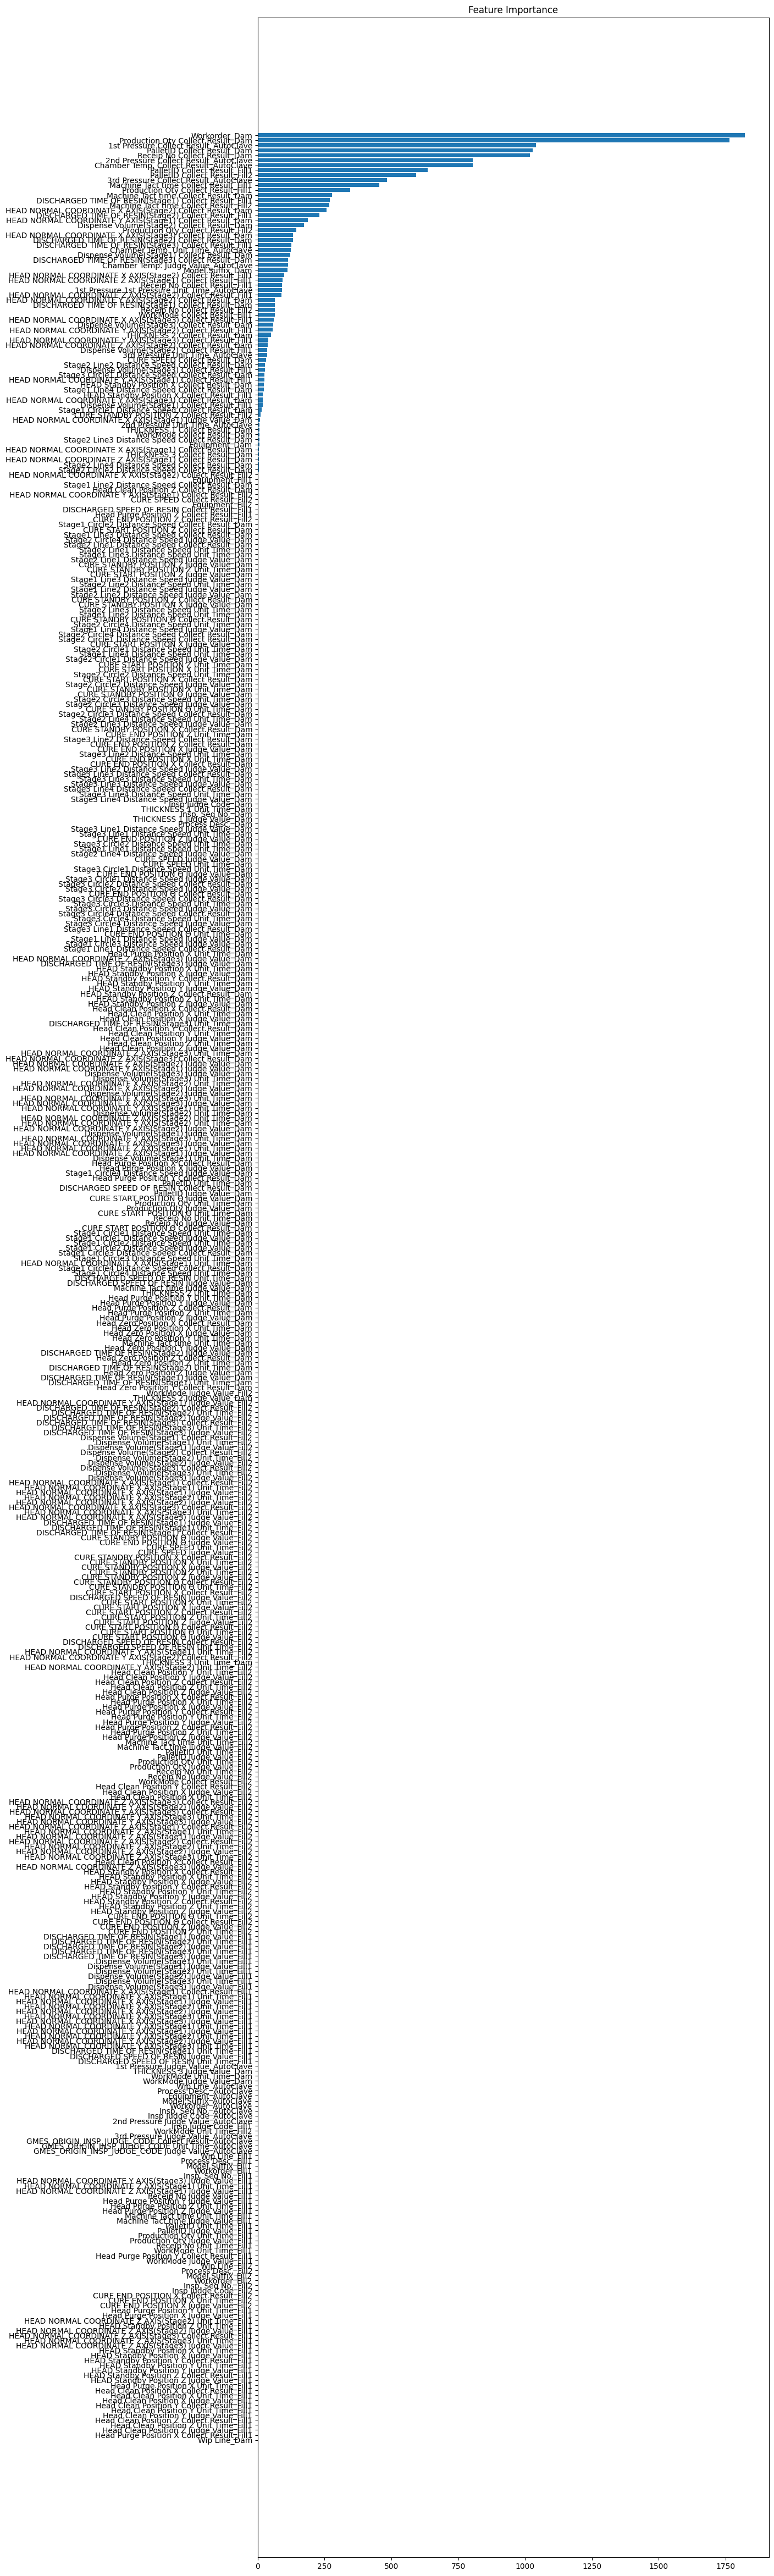

In [168]:
import matplotlib.pyplot as plt
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
for k in reversed(np.array(train_x.columns)[sorted_idx]):
    print(f"'{k}',")

# print(np.array(train_x.columns)[sorted_idx])
fig = plt.figure(figsize=(12, 60))


plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(train_x.columns)[sorted_idx])
plt.title('Feature Importance')


In [130]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

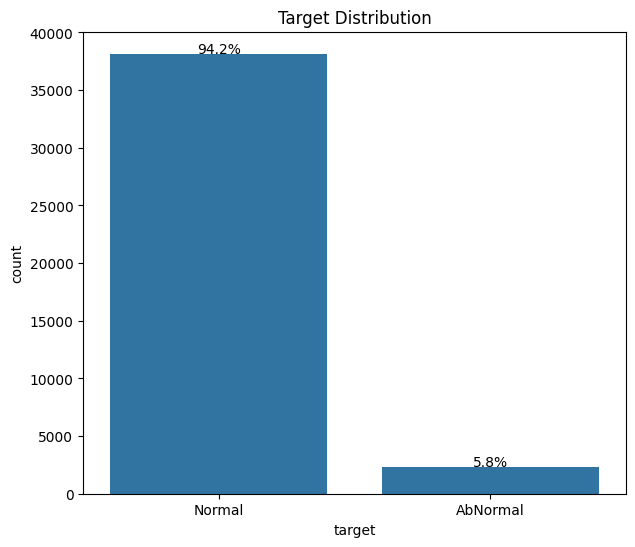

In [ ]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율

        # (x, y) 좌표에 텍스트 입력
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬

plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');


In [ ]:
columns=train.columns.values
bin_features=[]
for column in columns:
  if len(train[column].value_counts().unique())==2:
    bin_features.append(column)
print(bin_features)
print(len(bin_features))
for column in bin_features:
  if len(test[column].value_counts().unique())!=2:
    print(column)

['Equipment_Dam', 'CURE END POSITION X Collect Result_Dam', 'CURE END POSITION Z Collect Result_Dam', 'CURE END POSITION Θ Collect Result_Dam', 'CURE START POSITION X Collect Result_Dam', 'CURE START POSITION Θ Collect Result_Dam', 'HEAD Standby Position Y Collect Result_Dam', 'HEAD Standby Position Z Collect Result_Dam', 'Head Clean Position X Collect Result_Dam', 'Head Clean Position Y Collect Result_Dam', 'Head Purge Position Y Collect Result_Dam', 'Head Zero Position X Collect Result_Dam', 'Chamber Temp. Judge Value_AutoClave', 'Equipment_Fill1', 'HEAD Standby Position Y Collect Result_Fill1', 'HEAD Standby Position Z Collect Result_Fill1', 'Head Clean Position X Collect Result_Fill1', 'Head Clean Position Y Collect Result_Fill1', 'Head Clean Position Z Collect Result_Fill1', 'Head Purge Position X Collect Result_Fill1', 'Head Purge Position Y Collect Result_Fill1', 'Equipment_Fill2', 'CURE END POSITION X Collect Result_Fill2', 'CURE START POSITION X Collect Result_Fill2', 'HEAD NO

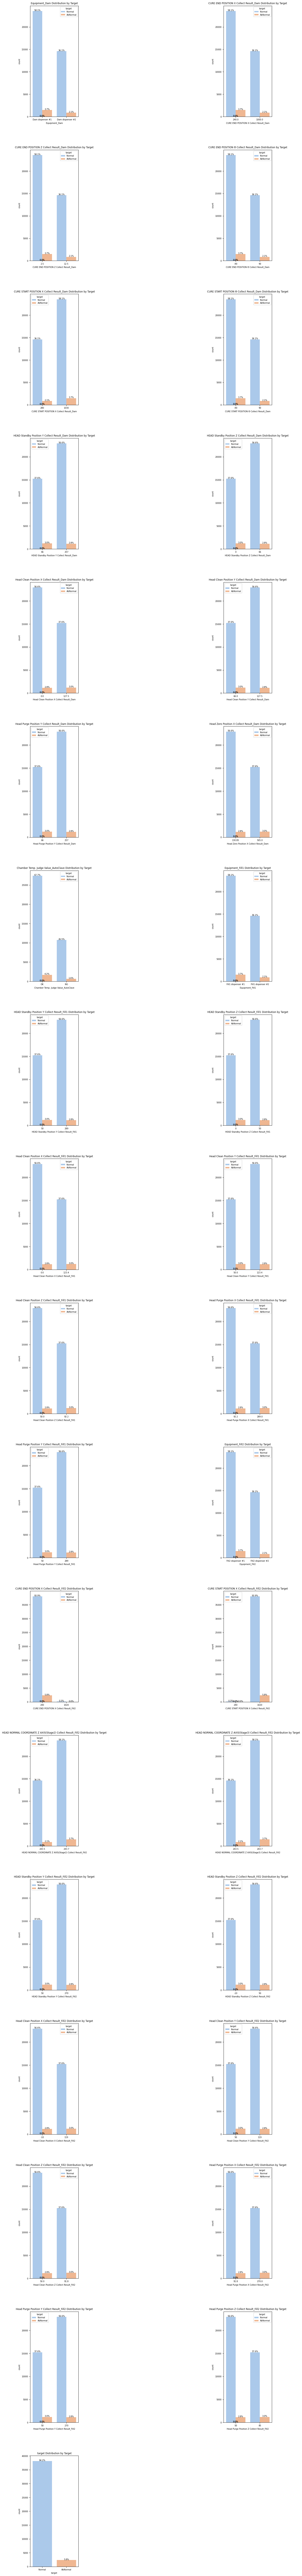

In [ ]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열 틀(Figure) 준비
mpl.rc('font', size=7)
grid = gridspec.GridSpec(18, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(15, 160))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=3, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기


for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])

    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                  data=train,
                  hue='target',
                  palette='pastel', # 그래프 색상 설정
                  ax=ax)

    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train))